In [234]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

data = pd.read_csv('data.csv', header=0, parse_dates=True)
data = data.dropna(subset=['Latitude','Longitude'])

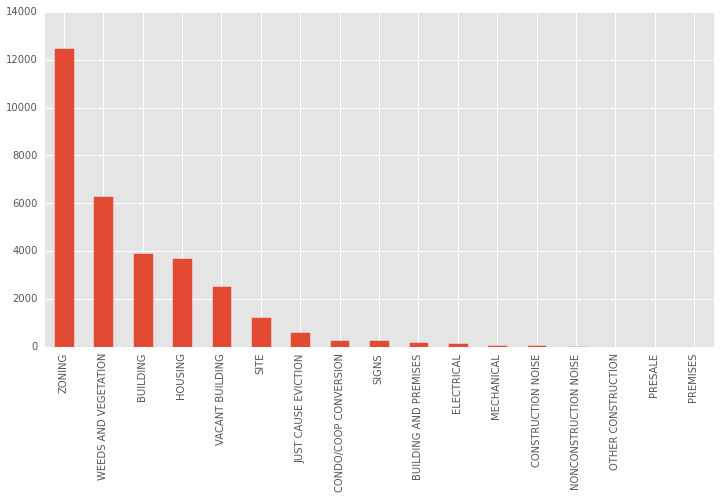

In [253]:
data['Case Group'].value_counts().plot(kind='bar', figsize=(12,6))

In [213]:
data['Case Group'].value_counts()

ZONING                   12476
WEEDS AND VEGETATION      6291
BUILDING                  3905
HOUSING                   3699
VACANT BUILDING           2522
SITE                      1265
JUST CAUSE EVICTION        608
CONDO/COOP CONVERSION      305
SIGNS                      301
BUILDING AND PREMISES      212
ELECTRICAL                 176
MECHANICAL                  92
CONSTRUCTION NOISE          84
NONCONSTRUCTION NOISE       54
OTHER CONSTRUCTION          11
PRESALE                      8
PREMISES                     4
dtype: int64

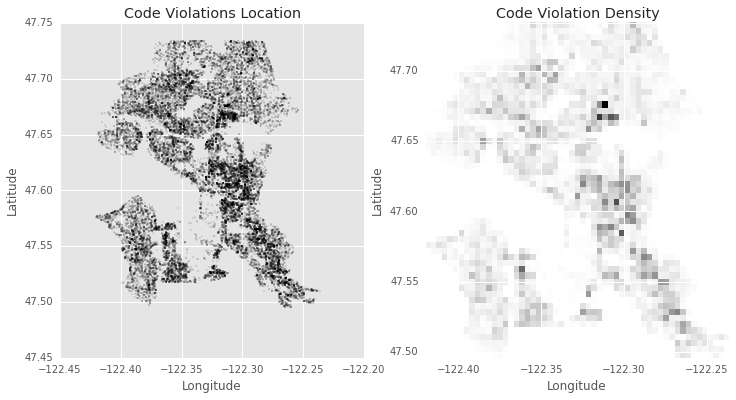

In [211]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

data.plot(kind='scatter', x='Longitude', y='Latitude', ax=axes[0], s=0.5, c='k',
          linewidths=0).set_title('Code Violations Location') 
axes[1].hist2d(data['Longitude'],data['Latitude'], bins=55)

axes[0].get_xaxis().get_major_formatter().set_useOffset(False) 
axes[1].get_xaxis().get_major_formatter().set_useOffset(False)
axes[1].set_title('Code Violation Density') 
axes[1].set_xlabel('Longitude') 
axes[1].set_ylabel('Latitude')

In [197]:
case_counts = data['Date Case Created'].value_counts()
inspec_counts = data['Last Inspection Date'].value_counts()
total_counts = case_counts + inspec_counts

case_dates = pd.to_datetime(case_counts.index, format='%m/%d/%Y')
inspec_dates = pd.to_datetime(inspec_counts.index, format='%m/%d/%Y')
total_dates = total_counts.index.to_datetime()

violations = pd.DataFrame({'Case Creation': pd.Series(case_counts.tolist(), index=case_dates),
                           'Followup Inspection': pd.Series(inspec_counts.tolist(), index=inspec_dates),
                          'Total Inspections': pd.Series(total_counts.tolist(), index=total_dates)})

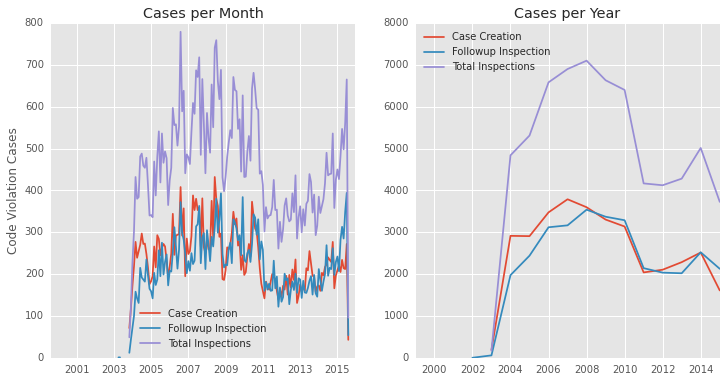

In [214]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].set_ylabel('Code Violation Cases')
violations.resample('M',how='sum').plot(ax=axes[0]).set_title('Cases per Month')
violations.resample('A',how='sum').plot(ax=axes[1]).set_title('Cases per Year')

In [151]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    diff = date - pd.datetime(2000, 12, 21)
    day = diff.total_seconds() / 24. / 3600
    day %= 365.25
    m = 1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(day * np.pi / 182.625))
    m = max(0, min(m, 2))
    return 24. * np.degrees(np.arccos(1 - m)) / 180.

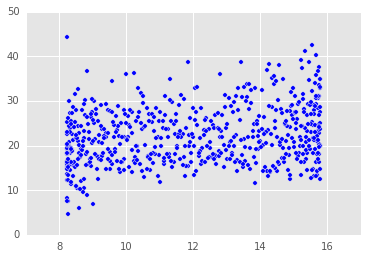

In [153]:
monthly = violations.resample('W')['Total Inspections']
adjusted_hours = monthly.index.map(hours_of_daylight)
plt.scatter(adjusted_hours, monthly)

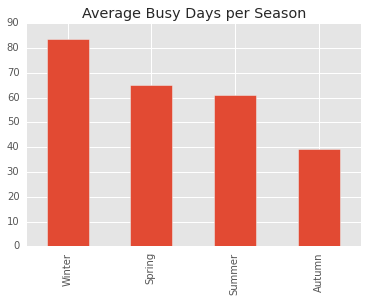

In [250]:
SEASON = {
    12: 'Winter',
    1: 'Winter',
    2: 'Winter',
    3: 'Winter',
    4: 'Spring',
    5: 'Spring',
    6: 'Spring',
    7: 'Summer',
    8: 'Summer',
    9: 'Summer',
    10: 'Autumn',
    11: 'Autumn'
}
case_seasons = pd.Series([SEASON[i] for i in case_dates.month])
(case_seasons.value_counts() / 12.).plot(kind='bar')
plt.title('Average Busy Days per Season')

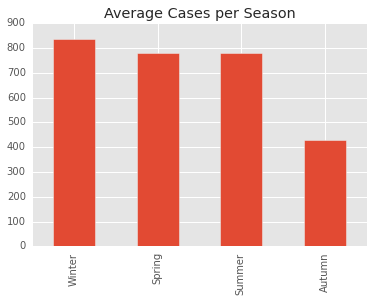

In [252]:
all_seasons = pd.Series([SEASON[i] for i in pd.DatetimeIndex(data['Date Case Created']).month])
(all_seasons.value_counts() / 12.).plot(kind='bar')
plt.title('Average Cases per Season')